# Creating DataFrames

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### Creating a Series object

In [2]:
list_A = ['Arjun', 'Anoop', 'Sanu']

In [3]:
Series_from_list_A = pd.Series(list_A)

In [4]:
Series_from_list_A

0    Arjun
1    Anoop
2     Sanu
dtype: object

In [5]:
type(Series_from_list_A)

pandas.core.series.Series

#### Creating DataFrame using list data

In [6]:
data_from_List_A = pd.DataFrame(list_A)

In [7]:
data_from_List_A

,0
0,Arjun
1,Anoop
2,Sanu


In [8]:
type(data_from_List_A)

pandas.core.frame.DataFrame

* Since it has no column name, we need to specify it.

In [9]:
data_from_List_A = pd.DataFrame(list_A, columns=['Names'])

In [10]:
data_from_List_A

,Names
0,Arjun
1,Anoop
2,Sanu


### Creating multiple columns

In [11]:
list_B = [90, 89 , 91]

In [12]:
data_from_both_Lists = pd.DataFrame(list(zip(list_A, list_B)), columns=['Names', 'Marks'])
data_from_both_Lists

,Names,Marks
0,Arjun,90
1,Anoop,89
2,Sanu,91


* Hence, we have created a multi column Dataframe from different list we have. The main point to note here is the length of each list should be same. If the length does not match, we’ll get an error.

# Creating DataFrame from list of dictionaries

In [13]:
dict_list = [
    {"Name": "Arjun", "Mark":90 },
    {"Name": "Anoop", "Mark":89 },
    {"Name": "Sanu", "Mark":91 }
]

In [14]:
dict_list

[{'Name': 'Arjun', 'Mark': 90},
 {'Name': 'Anoop', 'Mark': 89},
 {'Name': 'Sanu', 'Mark': 91}]

In [15]:
data_from_list_of_dict = pd.DataFrame(dict_list)

In [16]:
data_from_list_of_dict

,Name,Mark
0,Arjun,90
1,Anoop,89
2,Sanu,91


### Concatenating Series Objects

In [17]:
Series_1 = pd.Series(["A", "B", "C"])

In [18]:
Series_2 = pd.Series(["D", "E", "F"])

In [19]:
Series_1

0    A
1    B
2    C
dtype: object

In [20]:
Series_2

0    D
1    E
2    F
dtype: object

In [21]:
pd.concat([Series_1, Series_2])

0    A
1    B
2    C
0    D
1    E
2    F
dtype: object

#### Managing Duplicate index

In [22]:
pd.concat([Series_1, Series_2], ignore_index=True)

0    A
1    B
2    C
3    D
4    E
5    F
dtype: object

### Concatenating DataFrames

In [23]:
Arjun_scores = {
"subjects": ['maths', 'physics', 'chemistry', 'biology'],
"sem1":[60, 70, 80, 90],
"sem2":[63, 71, 85, 89],
}
Sanu_scores = {
"subjects": ['maths', 'physics', 'chemistry', 'computers'],
"sem1":[63, 77, 89, 92],
"sem2":[73, 81, 88, 83],
}

In [24]:
data_Arjun = pd.DataFrame(Arjun_scores)
data_Sanu = pd.DataFrame(Sanu_scores)

In [25]:
data_Arjun

,subjects,sem1,sem2
0,maths,60,63
1,physics,70,71
2,chemistry,80,85
3,biology,90,89


In [26]:
data_Sanu

,subjects,sem1,sem2
0,maths,63,73
1,physics,77,81
2,chemistry,89,88
3,computers,92,83


In [27]:
data_concatenated = pd.concat([data_Arjun, data_Sanu])
data_concatenated

,subjects,sem1,sem2
0,maths,60,63
1,physics,70,71
2,chemistry,80,85
3,biology,90,89
0,maths,63,73
1,physics,77,81
2,chemistry,89,88
3,computers,92,83


### Managing duplicate index

In [28]:
data_concatenated = pd.concat([data_Arjun, data_Sanu], ignore_index=True)
data_concatenated

,subjects,sem1,sem2
0,maths,60,63
1,physics,70,71
2,chemistry,80,85
3,biology,90,89
4,maths,63,73
5,physics,77,81
6,chemistry,89,88
7,computers,92,83


### Adding keys to DataFrames

In [29]:
data_concatenated = pd.concat([data_Arjun, data_Sanu], keys=['Arjun', 'Sanu'])
data_concatenated

subjects  sem1  sem2
Arjun 0      maths    60    63
      1    physics    70    71
      2  chemistry    80    85
      3    biology    90    89
Sanu  0      maths    63    73
      1    physics    77    81
      2  chemistry    89    88
      3  computers    92    83

###  Use of keys

In [33]:
data_concatenated.loc['Arjun']

,subjects,sem1,sem2
0,maths,60,63
1,physics,70,71
2,chemistry,80,85
3,biology,90,89


In [34]:
data_concatenated.loc['Sanu']

,subjects,sem1,sem2
0,maths,63,73
1,physics,77,81
2,chemistry,89,88
3,computers,92,83


### Merging DataFrames
* The most important part of merge over concat is that, the merge() combines the DataFrames on the basis of values  of common columns whereas concat() just appends the DataFrames.

In [35]:
data_Arjun

,subjects,sem1,sem2
0,maths,60,63
1,physics,70,71
2,chemistry,80,85
3,biology,90,89


In [36]:
data_Sanu

,subjects,sem1,sem2
0,maths,63,73
1,physics,77,81
2,chemistry,89,88
3,computers,92,83


In [37]:
data_Merged = pd.merge(data_Arjun, data_Sanu, on='subjects')
data_Merged

,subjects,sem1_x,sem2_x,sem1_y,sem2_y
0,maths,60,63,63,73
1,physics,70,71,77,81
2,chemistry,80,85,89,88


In [38]:
data_Merged = pd.merge(data_Arjun, data_Sanu, how='outer',on='subjects')
data_Merged

,subjects,sem1_x,sem2_x,sem1_y,sem2_y
0,maths,60.0,63.0,63.0,73.0
1,physics,70.0,71.0,77.0,81.0
2,chemistry,80.0,85.0,89.0,88.0
3,biology,90.0,89.0,NaN,NaN
4,computers,NaN,NaN,92.0,83.0


#### Changing the suffixes

In [ ]:
data_Merged = pd.merge(data_Arjun, data_Sanu, how='outer',on='subjects', suffixes=['_Arjun', '_Sanu'])
data_Merged

### Types of Joins

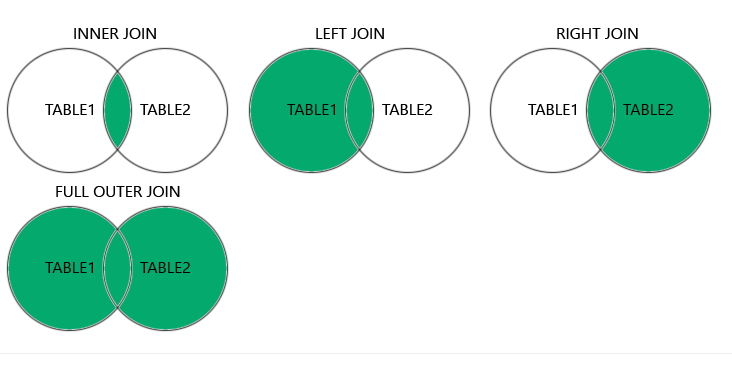!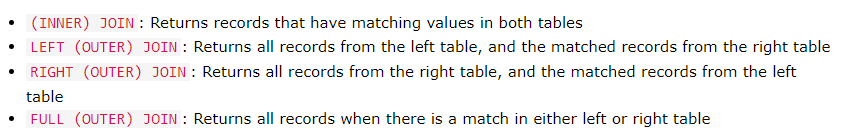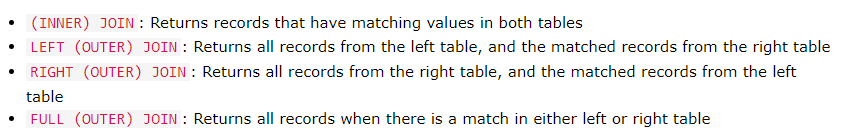

In [39]:
table_1_dict = {'OrderID': {0: 12025, 1: 12030, 2: 12032, 3: 12034, 4: 12035},
 'CustomerID': {0: 101, 1: 105, 2: 110, 3: 115, 4: 120},
 'OrderName': {0: 'Peter', 1: 'Robert', 2: 'James', 3: 'Andrew', 4: 'Mathew'},
 'ProductName': {0: 'ABC', 1: 'XYX', 2: 'XYZ', 3: 'PQR', 4: 'AAA'}}

In [40]:
Table_1 = pd.DataFrame(table_1_dict)

In [41]:
table_2_dict = {'CustomerID': {0: 100, 1: 101, 2: 103, 3: 105, 4: 110, 5: 120},
 'CustomerName': {0: 'Messy',
  1: 'Prince',
  2: 'Maria Fernandez',
  3: 'Jasmine',
  4: 'Faf Weasel',
  5: 'Romen Rocket'},
 'Country': {0: 'Maxico',
  1: 'Taiwan',
  2: 'Turkey',
  3: 'Paris',
  4: 'Indonesia',
  5: 'Russia'}}

In [42]:
Table_2 = pd.DataFrame(table_2_dict)

In [43]:
Table_1

,OrderID,CustomerID,OrderName,ProductName
0,12025,101,Peter,ABC
1,12030,105,Robert,XYX
2,12032,110,James,XYZ
3,12034,115,Andrew,PQR
4,12035,120,Mathew,AAA


In [44]:
Table_2

,CustomerID,CustomerName,Country
0,100,Messy,Maxico
1,101,Prince,Taiwan
2,103,Maria Fernandez,Turkey
3,105,Jasmine,Paris
4,110,Faf Weasel,Indonesia
5,120,Romen Rocket,Russia


In [45]:
pd.merge(Table_1, Table_2, how='inner', on='CustomerID')

,OrderID,CustomerID,OrderName,ProductName,CustomerName,Country
0,12025,101,Peter,ABC,Prince,Taiwan
1,12030,105,Robert,XYX,Jasmine,Paris
2,12032,110,James,XYZ,Faf Weasel,Indonesia
3,12035,120,Mathew,AAA,Romen Rocket,Russia


In [46]:
pd.merge(Table_1, Table_2, how='outer', on='CustomerID')

,OrderID,CustomerID,OrderName,ProductName,CustomerName,Country
0,12025.0,101,Peter,ABC,Prince,Taiwan
1,12030.0,105,Robert,XYX,Jasmine,Paris
2,12032.0,110,James,XYZ,Faf Weasel,Indonesia
3,12034.0,115,Andrew,PQR,NaN,NaN
4,12035.0,120,Mathew,AAA,Romen Rocket,Russia
5,NaN,100,NaN,NaN,Messy,Maxico
6,NaN,103,NaN,NaN,Maria Fernandez,Turkey


In [47]:
pd.merge(Table_1, Table_2, how='left', on='CustomerID')

,OrderID,CustomerID,OrderName,ProductName,CustomerName,Country
0,12025,101,Peter,ABC,Prince,Taiwan
1,12030,105,Robert,XYX,Jasmine,Paris
2,12032,110,James,XYZ,Faf Weasel,Indonesia
3,12034,115,Andrew,PQR,NaN,NaN
4,12035,120,Mathew,AAA,Romen Rocket,Russia


In [48]:
pd.merge(Table_1, Table_2, how='right', on='CustomerID')

,OrderID,CustomerID,OrderName,ProductName,CustomerName,Country
0,NaN,100,NaN,NaN,Messy,Maxico
1,12025.0,101,Peter,ABC,Prince,Taiwan
2,NaN,103,NaN,NaN,Maria Fernandez,Turkey
3,12030.0,105,Robert,XYX,Jasmine,Paris
4,12032.0,110,James,XYZ,Faf Weasel,Indonesia
5,12035.0,120,Mathew,AAA,Romen Rocket,Russia
